# GALAXY PROJECT

**Classifying galaxies by eye is very subjective ,so astronomers need a measurement that can be used to determine a galaxy’s shape, or morphology. Here we can do this by using information about the brightness of galaxies. The SDSS takes images in 5 different wavelength ranges across the visible light wavelength range, extending a little into the infra-red. These are called u, g, r , i and z. This project is done to classify the galaxies of the galaxy cluster Abell 2255 based on their shape.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset"Galaxy_Data"
data = pd.read_excel("Galaxy Dataset.xlsx")
print("The dataset we are using is given below: \n")
data.head(10)

The dataset we are using is given below: 



,objid,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
0,1.237672e+18,6162,301,3,133,991,3,258.055210,64.057640,25.72968,21.72870,21.27397,20.74825,21.13299,1.120512,0.096945,0.092488,0.085463,0.457963
1,1.237672e+18,6162,301,3,133,1002,3,258.063650,64.050667,23.14498,22.33704,21.78537,21.48095,21.35570,0.988865,0.188491,0.163356,0.183748,0.625124
2,1.237672e+18,6162,301,3,133,962,3,258.039392,64.046879,23.73964,22.70308,23.08325,22.13591,21.86266,0.880922,0.156852,0.298825,0.195676,0.525199
3,1.237672e+18,6162,301,3,133,968,3,258.041549,64.048902,24.44411,22.29080,21.79786,21.51736,21.25181,1.246201,0.114225,0.116852,0.119782,0.356305
4,1.237672e+18,6162,301,3,133,1375,3,258.030188,64.050391,23.64357,24.19473,22.85099,21.56622,21.39789,0.694288,0.421276,0.195880,0.093395,0.290012
5,1.237672e+18,6162,301,3,133,86,6,258.072335,64.040309,24.22702,20.88815,19.46177,18.49084,17.99513,0.904420,0.031100,0.014034,0.009903,0.020055
6,1.237672e+18,6162,301,3,133,122,6,258.061067,64.044919,25.01977,22.98697,21.93208,20.78950,20.40485,0.960866,0.177916,0.096312,0.051763,0.140298
7,1.237672e+18,6162,301,3,133,1608,3,258.045124,64.054067,23.03228,22.94671,22.33719,21.84371,22.16762,0.635381,0.230080,0.189898,0.182453,0.800965
8,1.237672e+18,6162,301,3,133,980,3,258.047727,64.050157,23.94058,22.26511,21.65991,21.55532,21.34402,1.105315,0.118225,0.096274,0.128207,0.393796
9,1.237672e+18,6162,301,3,133,986,3,258.055567,64.047936,22.42164,20.36793,19.63078,19.25985,19.15021,0.525343,0.034272,0.025991,0.027253,0.092879


In [3]:
#Filter the type to 3 which denote 'Galaxy'
data = data[data['type']==3]
data

,objid,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
0,1.237672e+18,6162,301,3,133,991,3,258.055210,64.057640,25.72968,21.72870,21.27397,20.74825,21.13299,1.120512,0.096945,0.092488,0.085463,0.457963
1,1.237672e+18,6162,301,3,133,1002,3,258.063650,64.050667,23.14498,22.33704,21.78537,21.48095,21.35570,0.988865,0.188491,0.163356,0.183748,0.625124
2,1.237672e+18,6162,301,3,133,962,3,258.039392,64.046879,23.73964,22.70308,23.08325,22.13591,21.86266,0.880922,0.156852,0.298825,0.195676,0.525199
3,1.237672e+18,6162,301,3,133,968,3,258.041549,64.048902,24.44411,22.29080,21.79786,21.51736,21.25181,1.246201,0.114225,0.116852,0.119782,0.356305
4,1.237672e+18,6162,301,3,133,1375,3,258.030188,64.050391,23.64357,24.19473,22.85099,21.56622,21.39789,0.694288,0.421276,0.195880,0.093395,0.290012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1.237672e+18,6162,301,3,133,556,3,258.141964,64.097187,18.69307,17.84919,17.73399,17.48569,17.51472,0.022584,0.005606,0.006103,0.006570,0.020339
477,1.237672e+18,6162,301,3,133,1077,3,258.109594,64.093406,23.70106,22.34153,21.69580,21.70668,21.66451,1.065835,0.137054,0.113023,0.167368,0.587921
478,1.237672e+18,6162,301,3,133,538,3,258.121166,64.096535,20.80324,18.97626,18.10119,17.68068,17.33710,0.116091,0.011173,0.007906,0.007745,0.018391
479,1.237672e+18,6162,301,3,133,1092,3,258.120833,64.093261,25.33561,22.57719,22.40158,22.15136,23.17128,0.878757,0.127538,0.150884,0.173215,0.619255


In [4]:
print("The shape of the dataset is \n", data.shape)

The shape of the dataset is 
 (300, 19)


In [5]:
#No. of Rows
print("There are",len(data.axes[0]),"instances.")
print("----------------------------------------")
#No. of variables
print("There are",len(data.axes[1]),"variables.")
print("-----------------------------------------------")
#Variable names
print('The columns of the dataset are \n', data.columns)
print("-----------------------------------------------")
#Information about the dataset
print('The information about the dataset is \n', data.info())
print("-----------------------------------------------")
#Description of the dataset
print('The description about the dataset is \n',data.describe())
print("-----------------------------------------------")
#Checking for null values
data.isnull().any()
print("-----------------------------------------------")
#To drop unwanted columns
df=data.drop(['Err_u','Err_g','Err_r','Err_i','Err_z','run','rerun','camcol','field'],axis=1)
df


There are 300 instances.
----------------------------------------
There are 19 variables.
-----------------------------------------------
The columns of the dataset are 
 Index(['objid', 'run', 'rerun', 'camcol', 'field', 'obj', 'type', 'ra', 'dec',
       'u', 'g', 'r', 'i', 'z', 'Err_u', 'Err_g', 'Err_r', 'Err_i', 'Err_z'],
      dtype='object')
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 480
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   objid   300 non-null    float64
 1   run     300 non-null    int64  
 2   rerun   300 non-null    int64  
 3   camcol  300 non-null    int64  
 4   field   300 non-null    int64  
 5   obj     300 non-null    int64  
 6   type    300 non-null    int64  
 7   ra      300 non-null    float64
 8   dec     300 non-null    float64
 9   u       300 non-null    float64
 10  g       300 non-null    float64
 11  r       300

,objid,obj,type,ra,dec,u,g,r,i,z
0,1.237672e+18,991,3,258.055210,64.057640,25.72968,21.72870,21.27397,20.74825,21.13299
1,1.237672e+18,1002,3,258.063650,64.050667,23.14498,22.33704,21.78537,21.48095,21.35570
2,1.237672e+18,962,3,258.039392,64.046879,23.73964,22.70308,23.08325,22.13591,21.86266
3,1.237672e+18,968,3,258.041549,64.048902,24.44411,22.29080,21.79786,21.51736,21.25181
4,1.237672e+18,1375,3,258.030188,64.050391,23.64357,24.19473,22.85099,21.56622,21.39789
...,...,...,...,...,...,...,...,...,...,...
476,1.237672e+18,556,3,258.141964,64.097187,18.69307,17.84919,17.73399,17.48569,17.51472
477,1.237672e+18,1077,3,258.109594,64.093406,23.70106,22.34153,21.69580,21.70668,21.66451
478,1.237672e+18,538,3,258.121166,64.096535,20.80324,18.97626,18.10119,17.68068,17.33710
479,1.237672e+18,1092,3,258.120833,64.093261,25.33561,22.57719,22.40158,22.15136,23.17128


In [6]:
#Adding columns u-g and g-r to the existing dataset 
df = df.assign(u_g = lambda x:df['u'] - df['g'],g_r = lambda x:df['g'] - df['r'])
df

,objid,obj,type,ra,dec,u,g,r,i,z,u_g,g_r
0,1.237672e+18,991,3,258.055210,64.057640,25.72968,21.72870,21.27397,20.74825,21.13299,4.00098,0.45473
1,1.237672e+18,1002,3,258.063650,64.050667,23.14498,22.33704,21.78537,21.48095,21.35570,0.80794,0.55167
2,1.237672e+18,962,3,258.039392,64.046879,23.73964,22.70308,23.08325,22.13591,21.86266,1.03656,-0.38017
3,1.237672e+18,968,3,258.041549,64.048902,24.44411,22.29080,21.79786,21.51736,21.25181,2.15331,0.49294
4,1.237672e+18,1375,3,258.030188,64.050391,23.64357,24.19473,22.85099,21.56622,21.39789,-0.55116,1.34374
...,...,...,...,...,...,...,...,...,...,...,...,...
476,1.237672e+18,556,3,258.141964,64.097187,18.69307,17.84919,17.73399,17.48569,17.51472,0.84388,0.11520
477,1.237672e+18,1077,3,258.109594,64.093406,23.70106,22.34153,21.69580,21.70668,21.66451,1.35953,0.64573
478,1.237672e+18,538,3,258.121166,64.096535,20.80324,18.97626,18.10119,17.68068,17.33710,1.82698,0.87507
479,1.237672e+18,1092,3,258.120833,64.093261,25.33561,22.57719,22.40158,22.15136,23.17128,2.75842,0.17561


In [7]:
#Eliptical galaxies have u-r values higher than 2.2, and spiral  galaxies have u-r values lower than 2.2
df = df.assign(u_r = lambda x:df['u'] - df['r'])
df

,objid,obj,type,ra,dec,u,g,r,i,z,u_g,g_r,u_r
0,1.237672e+18,991,3,258.055210,64.057640,25.72968,21.72870,21.27397,20.74825,21.13299,4.00098,0.45473,4.45571
1,1.237672e+18,1002,3,258.063650,64.050667,23.14498,22.33704,21.78537,21.48095,21.35570,0.80794,0.55167,1.35961
2,1.237672e+18,962,3,258.039392,64.046879,23.73964,22.70308,23.08325,22.13591,21.86266,1.03656,-0.38017,0.65639
3,1.237672e+18,968,3,258.041549,64.048902,24.44411,22.29080,21.79786,21.51736,21.25181,2.15331,0.49294,2.64625
4,1.237672e+18,1375,3,258.030188,64.050391,23.64357,24.19473,22.85099,21.56622,21.39789,-0.55116,1.34374,0.79258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1.237672e+18,556,3,258.141964,64.097187,18.69307,17.84919,17.73399,17.48569,17.51472,0.84388,0.11520,0.95908
477,1.237672e+18,1077,3,258.109594,64.093406,23.70106,22.34153,21.69580,21.70668,21.66451,1.35953,0.64573,2.00526
478,1.237672e+18,538,3,258.121166,64.096535,20.80324,18.97626,18.10119,17.68068,17.33710,1.82698,0.87507,2.70205
479,1.237672e+18,1092,3,258.120833,64.093261,25.33561,22.57719,22.40158,22.15136,23.17128,2.75842,0.17561,2.93403


In [8]:
#Add a column Shape to classify elliptical and spiral galaxies 
df.loc[df['u_r'] > 2.2,'Shape'] = 'Eliptical'  
df.loc[df['u_r'] < 2.2,'Shape'] = 'Spiral'
df

,objid,obj,type,ra,dec,u,g,r,i,z,u_g,g_r,u_r,Shape
0,1.237672e+18,991,3,258.055210,64.057640,25.72968,21.72870,21.27397,20.74825,21.13299,4.00098,0.45473,4.45571,Eliptical
1,1.237672e+18,1002,3,258.063650,64.050667,23.14498,22.33704,21.78537,21.48095,21.35570,0.80794,0.55167,1.35961,Spiral
2,1.237672e+18,962,3,258.039392,64.046879,23.73964,22.70308,23.08325,22.13591,21.86266,1.03656,-0.38017,0.65639,Spiral
3,1.237672e+18,968,3,258.041549,64.048902,24.44411,22.29080,21.79786,21.51736,21.25181,2.15331,0.49294,2.64625,Eliptical
4,1.237672e+18,1375,3,258.030188,64.050391,23.64357,24.19473,22.85099,21.56622,21.39789,-0.55116,1.34374,0.79258,Spiral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1.237672e+18,556,3,258.141964,64.097187,18.69307,17.84919,17.73399,17.48569,17.51472,0.84388,0.11520,0.95908,Spiral
477,1.237672e+18,1077,3,258.109594,64.093406,23.70106,22.34153,21.69580,21.70668,21.66451,1.35953,0.64573,2.00526,Spiral
478,1.237672e+18,538,3,258.121166,64.096535,20.80324,18.97626,18.10119,17.68068,17.33710,1.82698,0.87507,2.70205,Eliptical
479,1.237672e+18,1092,3,258.120833,64.093261,25.33561,22.57719,22.40158,22.15136,23.17128,2.75842,0.17561,2.93403,Eliptical


In [9]:
#Splitting the data into train and test set
X = df.drop(['Shape'], axis = 1)
y=df[['Shape']]
print(X)
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size= 0.30, random_state= 41)

            objid   obj  type          ra        dec         u         g  \
0    1.237672e+18   991     3  258.055210  64.057640  25.72968  21.72870   
1    1.237672e+18  1002     3  258.063650  64.050667  23.14498  22.33704   
2    1.237672e+18   962     3  258.039392  64.046879  23.73964  22.70308   
3    1.237672e+18   968     3  258.041549  64.048902  24.44411  22.29080   
4    1.237672e+18  1375     3  258.030188  64.050391  23.64357  24.19473   
..            ...   ...   ...         ...        ...       ...       ...   
476  1.237672e+18   556     3  258.141964  64.097187  18.69307  17.84919   
477  1.237672e+18  1077     3  258.109594  64.093406  23.70106  22.34153   
478  1.237672e+18   538     3  258.121166  64.096535  20.80324  18.97626   
479  1.237672e+18  1092     3  258.120833  64.093261  25.33561  22.57719   
480  1.237672e+18  1087     3  258.113923  64.099039  22.91893  22.21934   

            r         i         z      u_g      g_r      u_r  
0    21.27397  20.74825 

In [10]:
#Classifying the data using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

1.0

**The decision tree classifier model used gave us 100% accuracy.**

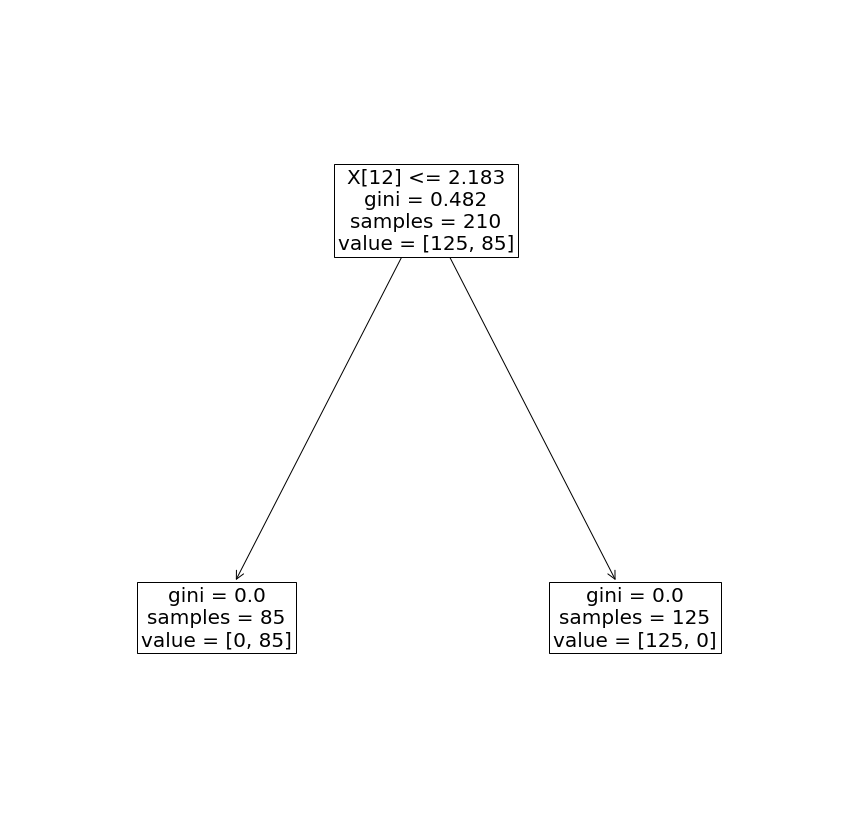

In [11]:
#Ploting the decision tree
from sklearn import tree
fig,axes = plt.subplots(figsize = (15,15))
tree.plot_tree(clf,fontsize = 20)
plt.show()

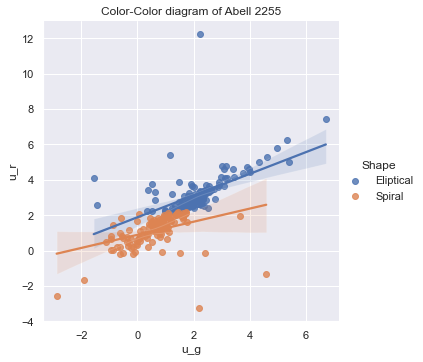

In [12]:
#Ploting the values using seaborn
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,10)})
sns.lmplot(x = 'u_g', y = 'u_r', data = df,hue = 'Shape').set(title = 'Color-Color diagram of Abell 2255')

**This trend line places the majority of the elliptical galaxies above the line and spiral galaxies below it.**

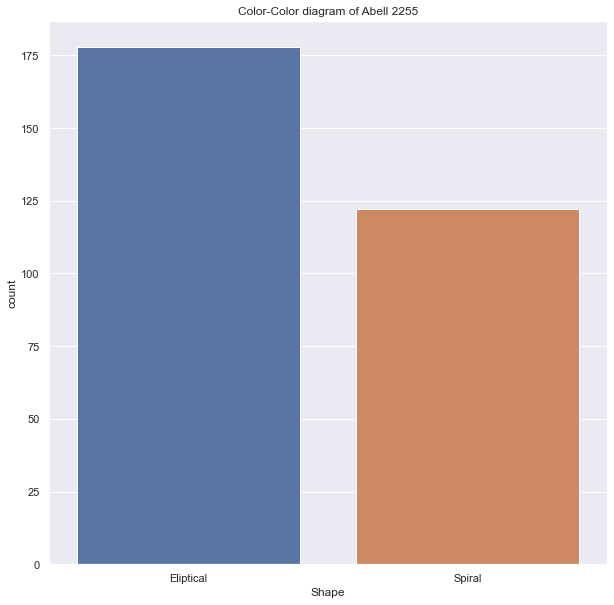

In [13]:
#To determining the count of elliptical and spiral galaxies using countplot
ax=sns.countplot(x='Shape',data = df).set(title = 'Color-Color diagram of Abell 2255')
plt.show()

In [25]:
siz_eli=df.Shape.value_counts().Eliptical
siz_eli

178

In [26]:
siz_Spi=df.Shape.value_counts().Spiral
siz_Spi

122

In [22]:
total = len(df)
total

300

In [24]:
per_Spi = (siz_Spi/total)*100
per_Spi

40.666666666666664

In [23]:
per_eli = (siz_eli/total)*100
per_eli

59.333333333333336

**Here the percentage of Eliptical galaxy 59.33 is greater than Spiral galaxy 40.66 which is evident from the countplot. 
In the universe there is a majority of elliptical galaxies which is clearly visible from the above countplot of Abell 2255 galaxy cluster.
This Galaxy project is useful in classifying the galaxies on the basis of their shape.**